## PHYS 121 Functions $-$ June, 16, 2022<br><br><sup> $\quad$ - Jake Bobowski</sup>

This notebook demonstrates some of the functions that have been written to allow PHYS 121 students to easily process data that they collect during the labs.  

Functions that have been written so far include:
* Generate scatter plots
* Weighted and unweighted linear fits
* Plot a histogram and generate basic statistics
* Overlay multiple histograms
* Generate multiple scatter plots on a single graph
* Import and display an image with a figure caption

All of the functions are contained in a file called 'PHYS121.py'.  The list of functions will certainly grow.  The ones that have be written so far were chosen based on some common tasks that students will need to complete.  To work, the PHYS121.py file must be in the same folder/directory as the working Jupyter Notebook (.ipynb file). 

### data_entry

First, we introduce a very useful fuction called 'data_entry'.  This function was written by Carl Michal, a physicist from UBC's Vancouver campus.  The original source code can be found here: https://www.phas.ubc.ca/~michal/data_entry.py.

The data_entry function allows you to enter data into a spreadsheet-like environment.  The function will also generate vectors from the columns of data which can then be used to process the data (calculations, plotting, fitting, etc.).  Once a table to data has been entered, a file of column separated values (csv file) will be created in the same directory as the working Jupyter Notebook.  Once this file has been created, the spreadsheet will be auto-populated if the csv file is called using data_entry.

To use data_entry, the file data_entry.py must be in the same directory as the working Jupyter Notebook.  

Here is an example implemntation of data_entry:
```python
import numpy as np
import data_entry
de = data_entry.sheet("example")
```
This example is demonstrated in the code cells below.

In [2]:
import numpy as np
import data_entry
de = data_entry.sheet("example")

Sheet name: example.csv


We can know use the vectors that have been created.  Let's first square the t data and then plot $D\pm \Delta D$ versus $t^2$.

<ErrorbarContainer object of 3 artists>

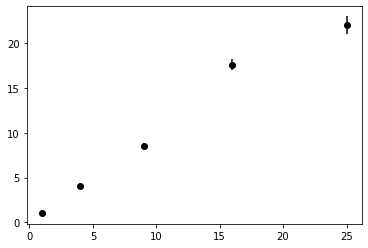

In [3]:
import matplotlib.pyplot as plt
v_tsq = v_t**2
plt.errorbar(v_tsq, v_D, v_errD, fmt = 'ko')

### LinearFit...

The linear-fit function is called as follows:
```python
LinearFit(xData, yData, yErrors = [], xlabel = 'x-axis', ylabel = 'y-axis', xUnits = '', yUnits = '', fill = False)
```
The xData and yData lists are required.  The others are optional with default values set.  The function returns the following outputs:
```python
Slope, Yintercept, errSlope, errYintercept, fig
```
The first four outputs are numerical values and 'fig' is the formatted plot. 

If $y$-uncertainities are provided, the function will perform a weighted fit.  The $y$-uncertainties list must be the same length as $x$- and $y$-data lists.  If $y$-uncertainties are not provided, the fit will be unweighted.  The other optional arguments include $x$- and $y$-axis names and units for the $x$- and $y$-datasets.  These must be entered as strings (enclosed in quotations) and they are used for formatting the outputs of the function.  If 'fill' is set to True, shading will be added around the best-fit line representing confindence intervals. 

### Unweighted Fit Example Implmentation
The code block below shows the most basic use of 'LinearFit' for an unweighted fit without any of the optional arguments.
```python
import PHYS121
V = [1, 2, 3, 4]
I = [0.12, 0.198, 0.285, 0.412]
m, b, dm, db, fig1 = PHYS121.LinearFit(V, I)
```

### Weighted Fit Example Implmentation
This second blcok of code shows how to use 'LinearFit' to do a weighted fit.  It also makes use of all of the other optional arguments.  
```python
import PHYS121
V = [1, 2, 3, 4]
I = [0.12, 0.198, 0.285, 0.412]
errI = [0.005, 0.012, 0.020, 0.025]
m, b, dm, db, fig1 = PHYS121.LinearFitFunction(V, I, errI, 'voltage' , 'current', 'V', 'A', True)
```

The two examples above are demonstrated in the code cells below.  However, instead of entering the data as comma-separated lists, we will use the data_entry function to generate the required vectors.  The 'm, b, dm, db, fig = ...' syntax is used to store the function outputs in varibles.

In [4]:
 de = data_entry.sheet("IvsV")

Sheet name: IvsV.csv


This is an **UNWEIGHTED** fit.

,,Value
slope,$m =$,0.0963+/-0.0081
$y$-intercept,$b =$,0.013+/-0.022


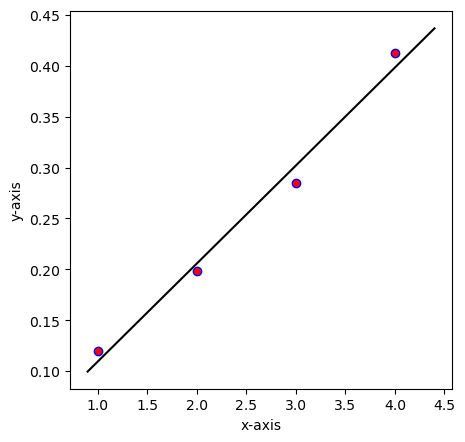

In [5]:
import PHYS121
#V = [1, 2, 3, 4]
#I = [0.12, 0.198, 0.285, 0.412]
m, b, dm, db, fig1 = PHYS121.LinearFit(v_V, v_I)

This is a **WEIGHTED** fit.

,,Value,Units
slope,$m =$,0.0890+/-0.0065,A/V
$y$-intercept,$b =$,0.0296+/-0.0098,A


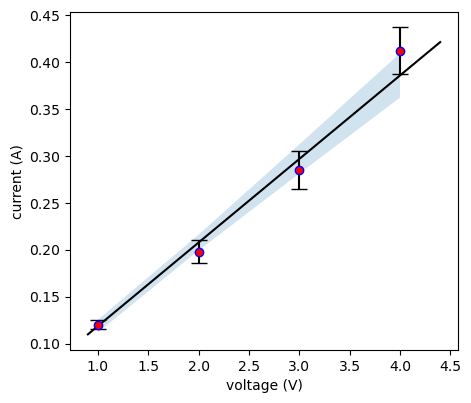

In [6]:
# Uncomment the three lines below if the cell above wasn't previously executed.
# import LFF
# V = [1, 2, 3, 4]
# I = [0.12, 0.198, 0.285, 0.412]
#errI = [0.005, 0.012, 0.020, 0.025]
m, b, dm, db, fig2 = PHYS121.LinearFit(v_V, v_I, v_errI, 'voltage' , 'current', 'V', 'A', True)

### Statistics...

The statistics function is called as follows:
```python
Statistics(data, nbins = 10, xlabel = 'x-axis', xUnits = '', normalized = False)
```
The data input is required, all other arguments are optional with default values set.  The function returns the following outputs:
```python
counts, centres, average, stdDev, stdError, fig
```
The first two outputs are lists, the next three are numerical values, and 'fig' is the formatted plot. 

The function calculates and reports the mean, standard deviation, and standard error of the provided data.  It also plots a histogram of the data.  

### Statistics Example Implmentation
The code block below shows an implementation of 'Statistics'.
```python
import PHYS121
theta20a = [2.02, 1.93, 1.92, 1.96, 2.03, 2.03, 1.96, 2.03, 2.06, 2, 2.03, 2.12, 2.07, 1.99, 1.99, 1.95, 2.03, 2.12, 2.03, 2.09, 2.03, 2.03, 2.01, 2.04, 2.03, 2.04, 1.99, 1.99, 1.97, 1.98]
cnts, ctrs, mean, stdDev, stdError, fig20a = PHYS121.Statistics(theta20a, 12, 'Period', 's', True);
```

The example below uses real data.  It represents the period $T$ of a simple pendulum when the bob is released from a starting point $\theta_0 = 20^\circ$. 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

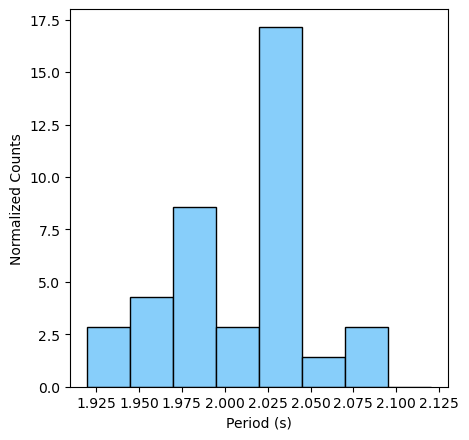

In [7]:
import PHYS121
theta20a = [2.02, 1.93, 1.92, 1.96, 2.03, 2.03, 1.96, 2.03, 2.06, 2, 2.03, 2.12, 2.07, 1.99, 1.99, 1.95, 2.03, 2.12, 2.03, 2.09, 2.03, 2.03, 2.01, 2.04, 2.03, 2.04, 1.99, 1.99, 1.97, 1.98]
cnts, ctrs, mean, stdDev, stdError, fig20a = PHYS121.Statistics(theta20a, 8, 'Period', 's', True)

Here is a second example.  The pendulum bob was released from the same initial angle $\theta_0=20^\circ$.  However, this time the $5T$ was measured which was then used calculate $T$.  The goal was to make a more accurate measurement of the period.

From the output below, we see that the stadard decreased by a factor of three when the measurement method was improved.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

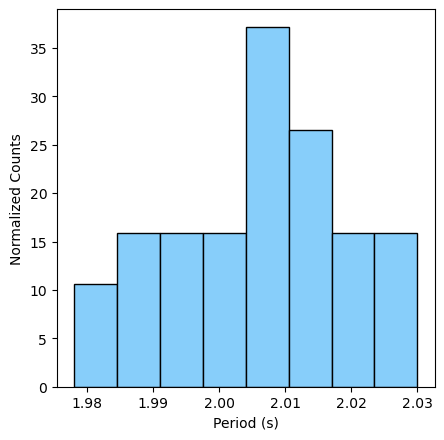

In [8]:
import numpy as np
theta20 = np.array([9.92, 9.93, 9.93, 10, 9.97, 9.97, 9.96, 10.07, 10.04, 10.08, 10.09, 9.93, 10.10, 10.03, 10.07, 9.89, 10.11, 10.06, 10.05, 10.05, 9.99, 10.12, 10.13, 10.12, 10.04, 10.15, 10.07, 10.02, 10.02, 10])/5
cnts, ctrs, mean20, stdDev, stdError20, fig20 = PHYS121.Statistics(theta20, 8, 'Period', 's', True)

### HistOverlay...

The HistOverlay function is called as follows:
```python
HistOverlay(dataArray, nbins = 10, xlabel = 'x-axis', xUnits = '',  normalized = True, transparency = 0.75)
```
The dataArray (a list of lists) input is required, all other arguments are optional with default values set.  The function returns the following outputs:
```python
countsArray, centresArray, fig
```
The first two outputs are lists of lists and 'fig' is the formatted plot. 

The dataArray is of the form dataArray = [[dataset1], [dataset2], ... [datasetN]].  The function plots the histograms of each of the datasets on a single graph.  If the normalized argument is True, then histogram is scaled such that the area under the distributions is 1.  This is a good option when comparing two different distribtuions.  The transparency argument (a number between 0 and 1) sets the transparency of each of the individual histograms.

### HistOverlay Example Implmentation
The code block below shows an implementation of 'HistOverlay'.
```python
import PHYS121
cnts, ctrs, fig = PHYS121.HistOverlay([theta20a, theta20], 8, 'Period', 's', True, 0.75)
```

The example below uses the two histograms above.  It shows that the period determined from 5 oscillations has a narrower distribution.

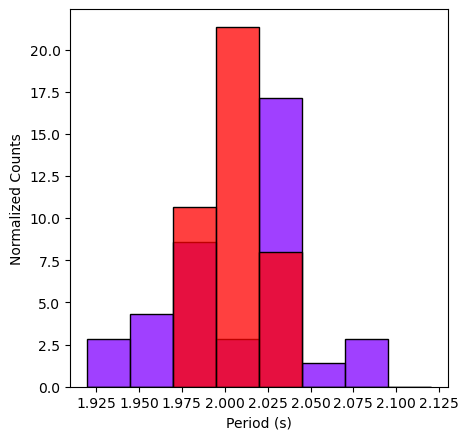

In [9]:
import PHYS121
cnts, ctrs, fig3 = PHYS121.HistOverlay([theta20a, theta20], 8, 'Period', 's', True, 0.75)

Here are several more histogram/statistics examples.  These datasets were taken by measuring the time for 5 full oscillations when the initial angle was from $\theta_0=5^\circ$ to $45^\circ$ in steps of $5^\circ$.  Using an experimental procedure that is sufficiently senstive allows one to detect the weak dependence of the period on the oscillation amplitude.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

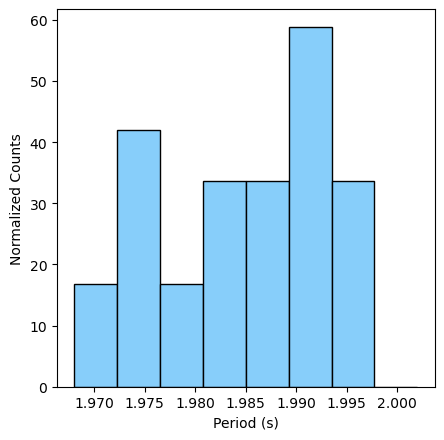

In [10]:
import PHYS121
import numpy as np
theta05 = np.array([9.84, 9.93, 9.97, 9.90, 9.90, 9.91, 9.88, 9.93, 9.92, 9.91, 9.96, 9.95, 9.97, 9.93, 9.93, 9.87, 9.96, 10.01, 9.87, 9.96, 9.92, 9.96, 9.87, 9.96, 9.84, 9.97, 9.97, 9.87, 10.01, 9.95])/5
cnts, ctrs, mean05, stdDev, stdError05, fig05 = PHYS121.Statistics(theta05, 8, 'Period', 's', True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

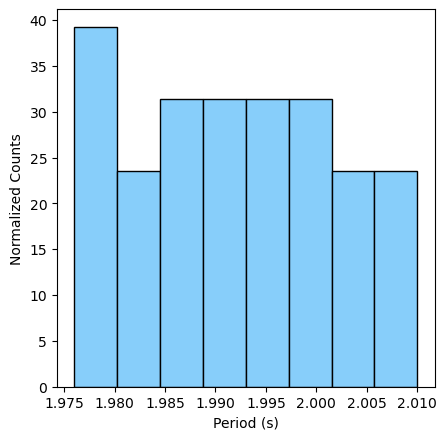

In [11]:
theta10 = np.array([9.89, 9.96, 9.95, 9.93, 10.02, 10.03, 9.90, 9.88, 9.99, 10.01, 9.99, 10, 9.98, 9.99, 9.97, 9.96, 9.92, 10.05, 9.98, 9.92, 10.03, 9.93, 9.97, 9.94, 9.91, 10.02, 9.93, 9.9, 9.9, 9.95])/5
cnts, ctrs, mean10, stdDev, stdError10, fig10 = PHYS121.Statistics(theta10, 8, 'Period', 's', True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

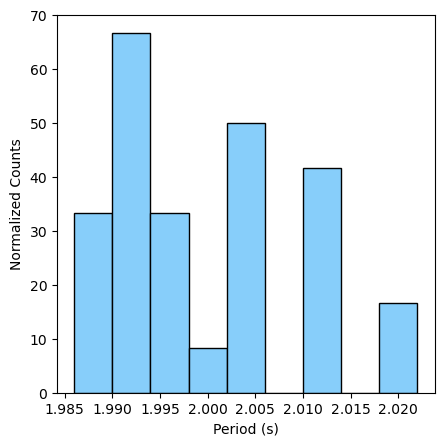

In [12]:
theta15 = np.array([10.01, 9.95, 9.98, 9.98, 9.96, 10.05, 9.96, 9.93, 10.05, 10.03, 10.02, 9.97, 9.96, 9.99, 10.02, 9.96, 10.09, 9.96, 9.93, 10.09, 10.06, 10.06, 9.96, 9.96, 10.03, 9.97, 9.95, 10.02, 9.96, 10.06])/5
cnts, ctrs, mean15, stdDev, stdError15, fig15 = PHYS121.Statistics(theta15, 8, 'Period', 's', True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

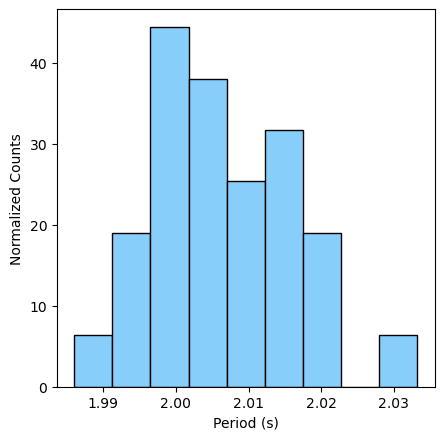

In [13]:
theta20 = np.array([10.03, 10.01, 9.93, 10, 10.09, 10.04, 9.97, 10.02, 10, 9.99, 10.03, 10.09, 9.97, 10.07, 10.06, 9.99, 10, 10.03, 10.08, 10.14, 10, 9.98, 10.02, 10.09, 10.04, 10, 10.08, 10.08, 10.06, 10.08])/5
cnts, ctrs, mean20, stdDev, stdError20, fig20 = PHYS121.Statistics(theta20, 8, 'Period', 's', True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

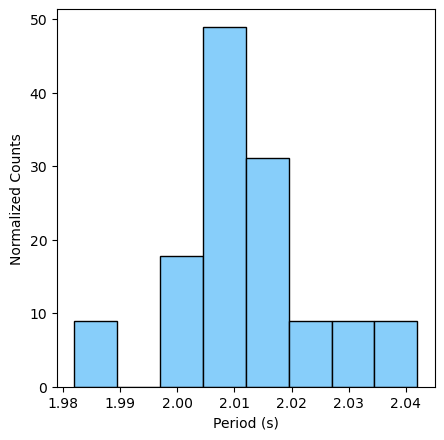

In [14]:
theta25 = np.array([10.12, 10.08, 10.15, 10.15, 10.07, 10.03, 10.05, 10.09, 10.01, 9.99, 10.09, 10.03, 10.05, 10.12, 10.18, 10.06, 9.94, 10.05, 10.21, 10.05, 10, 10.07, 10.09, 10.05, 10.06, 9.91, 10.02, 10.09, 10.06, 10.06])/5
cnts, ctrs, mean25, stdDev, stdError25, fig25 = PHYS121.Statistics(theta25, 8, 'Period', 's', True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

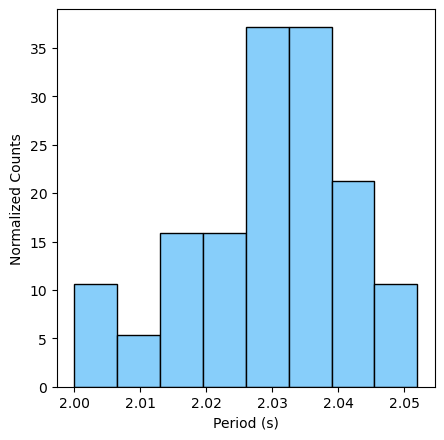

In [15]:
theta30 = np.array([10.2, 10.17, 10.03, 10.06, 10.2, 10.19, 10.17, 10, 10.13, 10.22, 10.09, 10.09, 10.14, 10.13, 10.11, 10.17, 10.09, 10.2, 10.15, 10.14, 10.18, 10.26, 10.24, 10.12, 10.1, 10.15, 10.19, 10.19, 10.14, 10.24])/5
cnts, ctrs, mean30, stdDev, stdError30, fig30 = PHYS121.Statistics(theta30, 8, 'Period', 's', True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

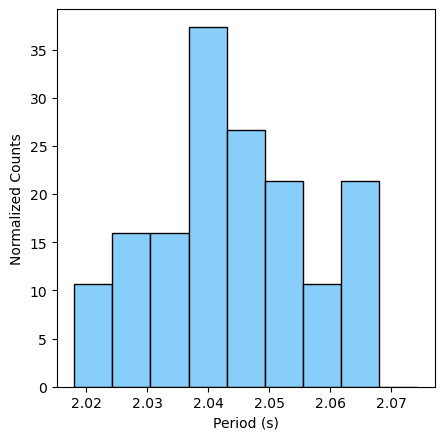

In [16]:
theta35 = np.array([10.26, 10.29, 10.09, 10.26, 10.23, 10.31, 10.23, 10.27, 10.21, 10.15, 10.34, 10.18, 10.26, 10.34, 10.21, 10.2, 10.1, 10.21, 10.18, 10.15, 10.23, 10.24, 10.2, 10.19, 10.19, 10.28, 10.15, 10.23, 10.18, 10.32])/5
cnts, ctrs, mean35, stdDev, stdError35, fig35 = PHYS121.Statistics(theta35, 8, 'Period', 's', True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

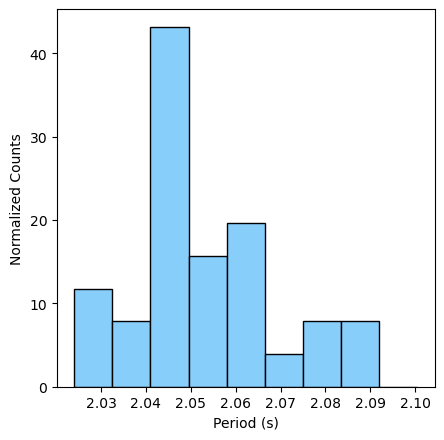

In [17]:
theta40 = np.array([10.42, 10.2, 10.4, 10.33, 10.29, 10.21, 10.4, 10.28, 10.2, 10.21, 10.37, 10.28, 10.24, 10.21, 10.15, 10.24, 10.21, 10.46, 10.32, 10.22, 10.26, 10.13, 10.33, 10.31, 10.12, 10.23, 10.22, 10.23, 10.31, 10.23])/5
cnts, ctrs, mean40, stdDev, stdError40, fig40 = PHYS121.Statistics(theta40, 8, 'Period', 's', True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

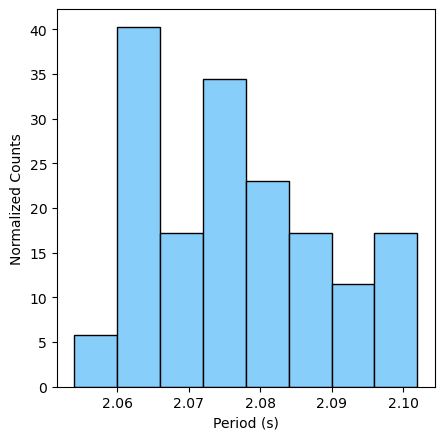

In [18]:
theta45 = np.array([10.36, 10.38, 10.31, 10.3, 10.34, 10.27, 10.34, 10.38, 10.44, 10.39, 10.41, 10.3, 10.48, 10.31, 10.32, 10.47, 10.39, 10.42, 10.38, 10.51, 10.49, 10.38, 10.49, 10.35, 10.39, 10.32, 10.37, 10.3, 10.45, 10.44])/5
cnts, ctrs, mean45, stdDev, stdError45, fig45 = PHYS121.Statistics(theta45, 8, 'Period', 's', True)

When the $5^\circ$, $10^\circ$, $15^\circ$ $20^\circ$, $25^\circ$, $30^\circ$ and $45^\circ$ histrograms are overlayed, one sees that the widths are all similar but the peak shifts to the right as $\theta_0$ is increased.  The equal widths is an indication that the standard deviations are the same.  This result is expected because all of the datasets were collected using the same experimental method (measuring the time for 5 full oscillations 30 times each).  The fact that the peak shifts to the right is an indication that the oscillation period increases slightly as $\theta_0$ is increased. 

Notice that the three distributions overlap significantly.  This means that taking single measurements of the period at each amplitude will not clearly reveal the dependence of the period on $\theta_0$ (even when making a relatively precise measurement).  Finding the mean of a large number of measurements is needed to clearly observe this effect.  

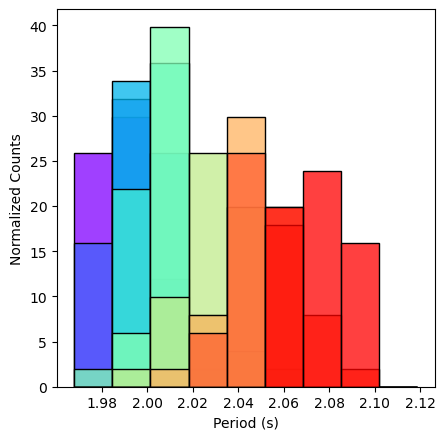

In [19]:
cnts, ctrs, fig = PHYS121.HistOverlay([theta05, theta10, theta15, theta20, theta25, theta30, theta35, theta40, theta45], 8, 'Period', 's')

### Scatter...

The function for generating scatter plots is called as follows:
```python
Scatter(xData, yData, yErrors = [], xlabel = 'x-axis', ylabel = 'y-axis', xUnits = '', yUnits = '', fill = False, show = True)
```
The 'xData' and 'yData' inputs are required, all other arguments are optional with default values set.  The function returns the a single output (the formatted plot):
```python
fig
```

The function will do a simple scatter plot if no 'yError' are included.  It will included error bars if 'yErrors' are passed to the function.  The 'fill' and 'show' arguments should generally be false.  They are used by the linear fit function which calls the scatter plot function to generate its graphs.  

### Scatter Example Implmentation
The code block below shows an implementation of 'Scatter'.
```python
import PHYS121
theta = [10, 20, 30] # degrees
T = [mean10, mean20, mean30] # s
errT = [stdError10, stdError20, stdError30] # s
fig = PHYS121.Scatter(theta, T, errT, 'initial angle' , 'period', 'degrees', 's')
```

The example below uses real data.  It represents the period $T$ of a simple pendulum as a function of the oscillation amplitude.  The means and standar errors are taken from the 'Statistics' examples above.  The plot clearly shows a statistically significant dependence of the pendulum's period on the oscillation amplitude.

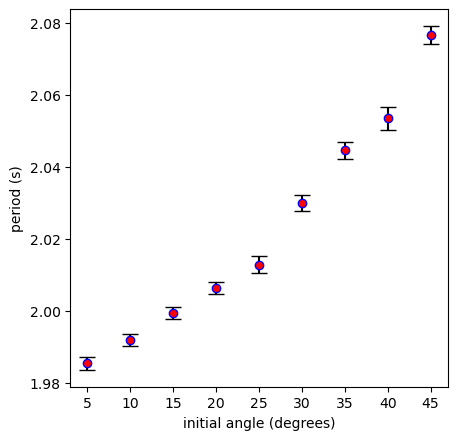

In [20]:
import PHYS121
theta = [5, 10, 15, 20, 25, 30, 35, 40, 45] # degrees
T = [mean05, mean10, mean15, mean20, mean25, mean30, mean35, mean40, mean45] # s
errT = [stdError05, stdError10, stdError15, stdError20, stdError25, stdError30, stdError35, stdError40, stdError45] # s
fig = PHYS121.Scatter(theta, T, errT, 'initial angle' , 'period', 'degrees', 's')

### MultiScatter...

The function for generating multiple scatter plots on a single graph is called as follows:
```python
MultiScatter(DataArray, xlabel = 'x-axis', ylabel = 'y-axis', xUnits = '', yUnits = '')
```
The 'DataArray' input is required, all other arguments are optional with default values set.  The function returns the a single output (the formatted plot):
```python
fig
```

DataArray takes the form of nested lists: DataArray = [[x1, y1, dy1], [x2, y2], [x3, y3, dy3], ...], where x1, y1, dy1, x2, y2, ... are themselves lists.  Notice that each sublist ([x1, y1, dy1] or [x2, y2]) can be either two or three elements long.  If the sublist contains three elements, a scatter plot with error bars will be generated.  If the sublist contains only two elements, a scatter plot with no error bars will be generated.  'DataArray' can mix sublists with two and three elements.

### MultiScatter Example Implmentation
The code block below shows an implementation of 'MultiScatter'.
```python
import PHYS121
V1 = [1, 2, 3, 4]
I1 = [0.12, 0.198, 0.285, 0.412]
errI1 = [0.005, 0.012, 0.020, 0.025]

V2 = [1, 2, 3, 4, 5]
I2 = [0.25, 0.31, 0.405, 0.602, .682]

V3 = [1, 2, 3, 4]
I3 = [0.05, 0.11, 0.155, 0.252]
errI3 = [0.005, 0.012, 0.020, 0.025]

V4 = np.array([1.5, 2.5, 3.5, 4.5])
I4 = [0.05, -0.11, -0.155, -.23]

DataArray = [[V1, I1, errI1], [V2, I2], [V3, I3, errI3], [V4, I4]]

fig = PHYS121.MultiScatter(DataArray, 'time', 'position', 's', 'cm');
```

The example above is demonstrated in the code cell below.  Instead of entering the data using comma-separated lists, the data_entry function will be used to generate the required vectors.  The 'fig = ...' syntax is used to store the figure that is produced in a varible called 'fig'.

In [21]:
de = data_entry.sheet("multiData")

Sheet name: multiData.csv


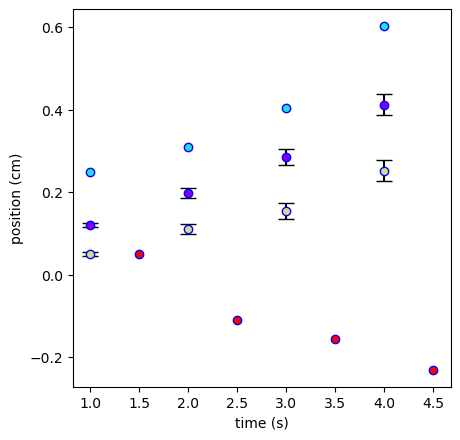

In [22]:
import PHYS121
#V1 = [1, 2, 3, 4]
#I1 = [0.12, 0.198, 0.285, 0.412]
#errI1 = [0.005, 0.012, 0.020, 0.025]

#V2 = [1, 2, 3, 4, 5]
#I2 = [0.25, 0.31, 0.405, 0.602, .682]

#V3 = [1, 2, 3, 4]
#I3 = [0.05, 0.11, 0.155, 0.252]
#errI3 = [0.005, 0.012, 0.020, 0.025]

#V4 = [1.5, 2.5, 3.5, 4.5]
#I4 = [0.05, -0.11, -0.155, -.23]

DataArray = [[v_V1, v_I1, v_errI1], [v_V2, v_I2], [v_V3, v_I3, v_errI3], [v_V4, v_I4]]

fig = PHYS121.MultiScatter(DataArray, 'time', 'position', 's', 'cm')

### ImportImage...

The function for importing and displaying an image (with an optional caption) is called as follows:
```python
ImportImage(filename, caption = '', rotation = 0)
```
The 'filename' input is required.  The file name must be a string and it must have one of the following extentions:
 - png
 - jpg
 - jpeg
 - gif
 - eps
The figure file must also be located in the same directory as your working Jupyter Notebook file.

All other arguments are optional with default values set.  The first optional argument is a caption for the figure and it must be a string.  The second optional argument is a numerical value (float or integer).  It is the amount to rotate the image in degrees.   The function returns the a single output (the formatted figure):
```python
fig
```

### ImportImage Example Implmentation
The code block below shows an implementation of 'ImportImage'.
```python
import PHYS121
caption = 'Here is some example caption text.'
fig = PHYS121.ImportImage('pic.jpg', caption, -90)
```

The example above is demonstrated in the code cell below.  The 'fig = ...' syntax is used to store the figure that is produced in a varible called 'fig'.

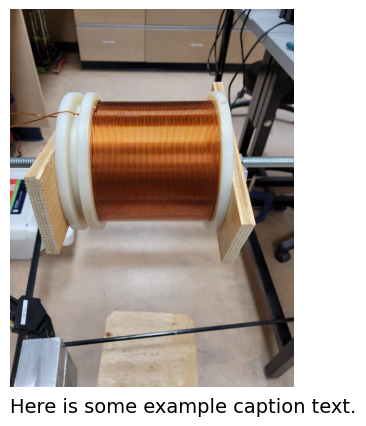

In [23]:
import PHYS121
caption = 'Here is some example caption text.'
fig = PHYS121.ImportImage('pic.jpg', caption, -90)

### Using the 'uncertainties' module.
Here we demonstrate the use of the 'uncertainties' module to do error calculations and display formatted numerical values with uncertainties included.

First, after importing the required modules, a numerical value and its uncertainty can be entered as follows:
```python
x = ufloat(x_value, x_error)
```

In [24]:
from uncertainties import ufloat
from uncertainties.umath import *  # Imports sin(), etc.
x = ufloat(1, 0.1)
y = ufloat(2, 0.15)

Print can be used to display these values with their uncertainties.

In [25]:
print(x)
print(y)

1.00+/-0.10
2.00+/-0.15


We can now do calculations with $x$ and $y$ and the errors will be propagated properly.  Note that the uncertainties will propagate errors in quadrature.  For this reason, at this time, I do not suggest using the uncertainties package to do error calculations. 

In [26]:
z = x + y
print(z)

3.00+/-0.18


A situation in which propagation of errors calculations using 'uncertainties' module may be useful is when there is no standard first-year rule for the propagation of errors (addition, subtraction, multiplication, division).  For example, consider the natural logarithm and trig functions.  (In Python, the natural logarithm is denoted $\log$ and log base 10 is denoted $\mathrm{log10}$.)

In [27]:
print(tan(x))
print(log(y))

1.56+/-0.34
0.69+/-0.07


Notice that the errors are the expected values.  If $y=f(x)$ and $x\pm \Delta x$ has been measured, then $\Delta y = \dfrac{\partial f}{\partial x}\Delta x$.  

If $z=\tan(x)$, then $\Delta z = \dfrac{\Delta x}{\cos^2 x}$. 

If $z=\ln y$, then $\Delta z = \dfrac{\Delta y}{y}$.